<a href="https://colab.research.google.com/github/Kufzuk2/Comp_math/blob/main/sem2_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [40]:
def adams_methods(f, x0, y0, t0, tn, h, orders):
    t_values = np.arange(t0, tn + h, h)
    solutions = {order: ([(0, 0) for _ in range(0, len(t_values))])for order in orders}
    n = len(t_values)

    for order in orders:
        solutions[order][0] = x0, y0
        for i in range(1, order):
            t = t_values[i-1]
            x, y = solutions[order][i-1]
            k1_x, k1_y = f(x, y)
            k2_x, k2_y = f(x + h * k1_x / 2, y + h*k1_y/2)
            k3_x, k3_y = f(x + h * k2_x/2, y + h*k2_y/2)
            k4_x, k4_y = f(x + h*k3_x, y + h*k3_y)
            solutions[order][i] = x + h * (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6, y + h * (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6

        for i in range(order, n):
            t_prev = t_values[i-1]
            y_prev = solutions[order][i-1]

            if order == 2:
                f_prev_x, f_prev_y = f(t_prev, y_prev)
                f_prev_prev_x, f_prev_prev_y = f(t_values[i-2], solutions[order][i-2])
                solutions[order][i] = y_prev + h * (3*f_prev - f_prev_prev) / 2

            elif order == 3:
                f_prev = f(t_prev, y_prev)
                f_prev_prev = f(t_values[i-2], solutions[order][i-2])
                f_prev_prev_prev = f(t_values[i-3], solutions[order][i-3])
                solutions[order][i] = y_prev + h * (23*f_prev - 16*f_prev_prev + 5*f_prev_prev_prev) / 12

            elif order == 4:
                f_prev = f(t_prev, y_prev)
                f_prev_prev = f(t_values[i-2], solutions[order][i-2])
                f_prev_prev_prev = f(t_values[i-3], solutions[order][i-3])
                f_prev_prev_prev_prev = f(t_values[i-4], solutions[order][i-4])
                solutions[order][i] = y_prev + h * (55*f_prev - 59*f_prev_prev + 37*f_prev_prev_prev - 9*f_prev_prev_prev_prev) / 24

    return t_values, solutions

In [ ]:
def backward_differentiation_methods(f, y0, t0, tn, h, orders):
    t_values = np.arange(t0, tn + h, h)
    solutions = {order: np.zeros_like(t_values) for order in orders}
    n = len(t_values)

    for order in orders:
        solutions[order][0] = y0
        for i in range(1, order):
            t = t_values[i-1]
            y = solutions[order][i-1]
            k1_x, k1_y = f(x, y)
            k2_x, k2_y = f(x + h*k1_x/2, y + h*k1_y/2)
            k3_x, k3_y = f(x + h*k2_x/2, y + h*k2_y/2)
            k4_x, k4_y = f(x + h*k3_x, y + h*k3_y)
            solutions[order][i] = y + h * (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6, y + h * (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6


        for i in range(order, n):
            if order == 2:
                solutions[order][i] = (4*solutions[order][i-1] - solutions[order][i-2] + 2*h*f(t_values[i], 0)) / 3
                for _ in range(3):  # Несколько итераций для улучшения точности
                    solutions[order][i] = (4*solutions[order][i-1] - solutions[order][i-2] + 2*h*f(t_values[i], solutions[order][i])) / 3

            elif order == 3:
                # BDF3
                solutions[order][i] = (18*solutions[order][i-1] - 9*solutions[order][i-2] + 2*solutions[order][i-3] + 6*h*f(t_values[i], 0)) / 11
                # Итеративно уточняем решение
                for _ in range(3):
                    solutions[order][i] = (18*solutions[order][i-1] - 9*solutions[order][i-2] + 2*solutions[order][i-3] + 6*h*f(t_values[i], solutions[order][i])) / 11

            elif order == 4:
                # BDF4
                solutions[order][i] = (48*solutions[order][i-1] - 36*solutions[order][i-2] + 16*solutions[order][i-3] - 3*solutions[order][i-4] + 12*h*f(t_values[i], 0)) / 25
                # Итеративно уточняем решение
                for _ in range(3):
                    solutions[order][i] = (48*solutions[order][i-1] - 36*solutions[order][i-2] + 16*solutions[order][i-3] - 3*solutions[order][i-4] + 12*h*f(t_values[i], solutions[order][i])) / 25

    return t_values, solutions

In [28]:
def runge_kutta_methods(f, y0, t0, tn, h, orders):
    t_values = np.arange(t0, tn + h, h)
    solutions = {order: ([(0, 0) for _ in range(0, len(t_values))])for order in orders}


    for order in orders:
        solutions[order][0] = x0, y0
        for i in range(1, len(t_values)):
            t = t_values[i-1]
            x, y = solutions[order][i-1]
            # x =

            if order == 1:  # Метод Эйлера (Рунге-Кутта 1 порядка)
                k1_x, k1_y = f(x, y)
                solutions[order][i] = x + h * k1_x, y + h * k1_y

            elif order == 2:  # Метод Хойна (Рунге-Кутта 2 порядка)
                k1_x, k1_y = f(x, y)
                k2_x, k2_y = f(x + h * k1_x, y + h * k1_y)
                solutions[order][i] = x + h * (k1_x + k2_x) / 2, y + h * (k1_y + k2_y) / 2

            elif order == 3:  # Метод Рунге-Кутта 3 порядка
                k1_x, k1_y = f(x, y)
                k2_x, k2_y = f(x + h * k1_x/2, y + h*k1_y/2)
                k3_x, k3_y = f(x + -h*k1_x + 2*h*k2_x, y - h*k1_y + 2*h*k2_y)
                solutions[order][i] = x + h * (k1_x + 4*k2_x + k3_x) / 6, y + h * (k1_y + 4*k2_y + k3_y) / 6

            elif order == 4:  # Классический метод Рунге-Кутта 4 порядка
                k1_x, k1_y = f(x, y)
                k2_X, k2_y = f(x + h*k1_x/2, y + h*k1_y/2)
                k3_x, k3_y = f(x + h*k2_x/2, y + h*k2_y/2)
                k4_x, k4_y = f(x + h*k3_x, y + h*k3_y)
                solutions[order][i] = x + h * (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6, y + h * (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6

    return t_values, solutions

In [41]:
def f(x, y):
    return y, x * x - 1


y0 = 0.0
x0 = 1.1

tn = 2
t0 = 0
h = 0.01

# t_rk, sol_rk = runge_kutta_methods(f, y0, t0, tn, h, orders=[1, 2, 3, 4])
t_adams, sol_adams = adams_methods(f, x0, y0, t0, tn, h, orders=[2, 3, 4])
# t_bdf, sol_bdf = backward_differentiation_methods(f, y0, t0, tn, h, orders=[2, 3, 4])

# Визуализация результатов
plt.figure(figsize=(15, 10))

# Графики для методов Рунге-Кутта
plt.subplot(3, 1, 1)
# plt.plot(t_exact, y_exact, 'k-', label='Точное решение')
# for order in [1, 2, 3, 4]:
#     plt.plot(t_rk, sol_rk[order], label=f'Рунге-Кутта {order} порядка')
# plt.title('Методы Рунге-Кутта')
# plt.xlabel('t')
# plt.ylabel('y(t)')
# plt.legend()
# plt.grid(True)

# # Графики для методов Адамса
plt.subplot(3, 1, 2)
plt.plot(t_exact, y_exact, 'k-', label='Точное решение')
for order in [2, 3, 4]:
    plt.plot(t_adams, sol_adams[order], label=f'Адамс {order} порядка')
plt.title('Методы Адамса')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)

# # Графики для методов BDF
# plt.subplot(3, 1, 3)
# plt.plot(t_exact, y_exact, 'k-', label='Точное решение')
# for order in [2, 3, 4]:
#     plt.plot(t_bdf, sol_bdf[order], 'o--', label=f'BDF {order} порядка')
# plt.title('Методы Формулы Дифференцирования Назад (BDF)')
# plt.xlabel('t')
# plt.ylabel('y(t)')
# plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

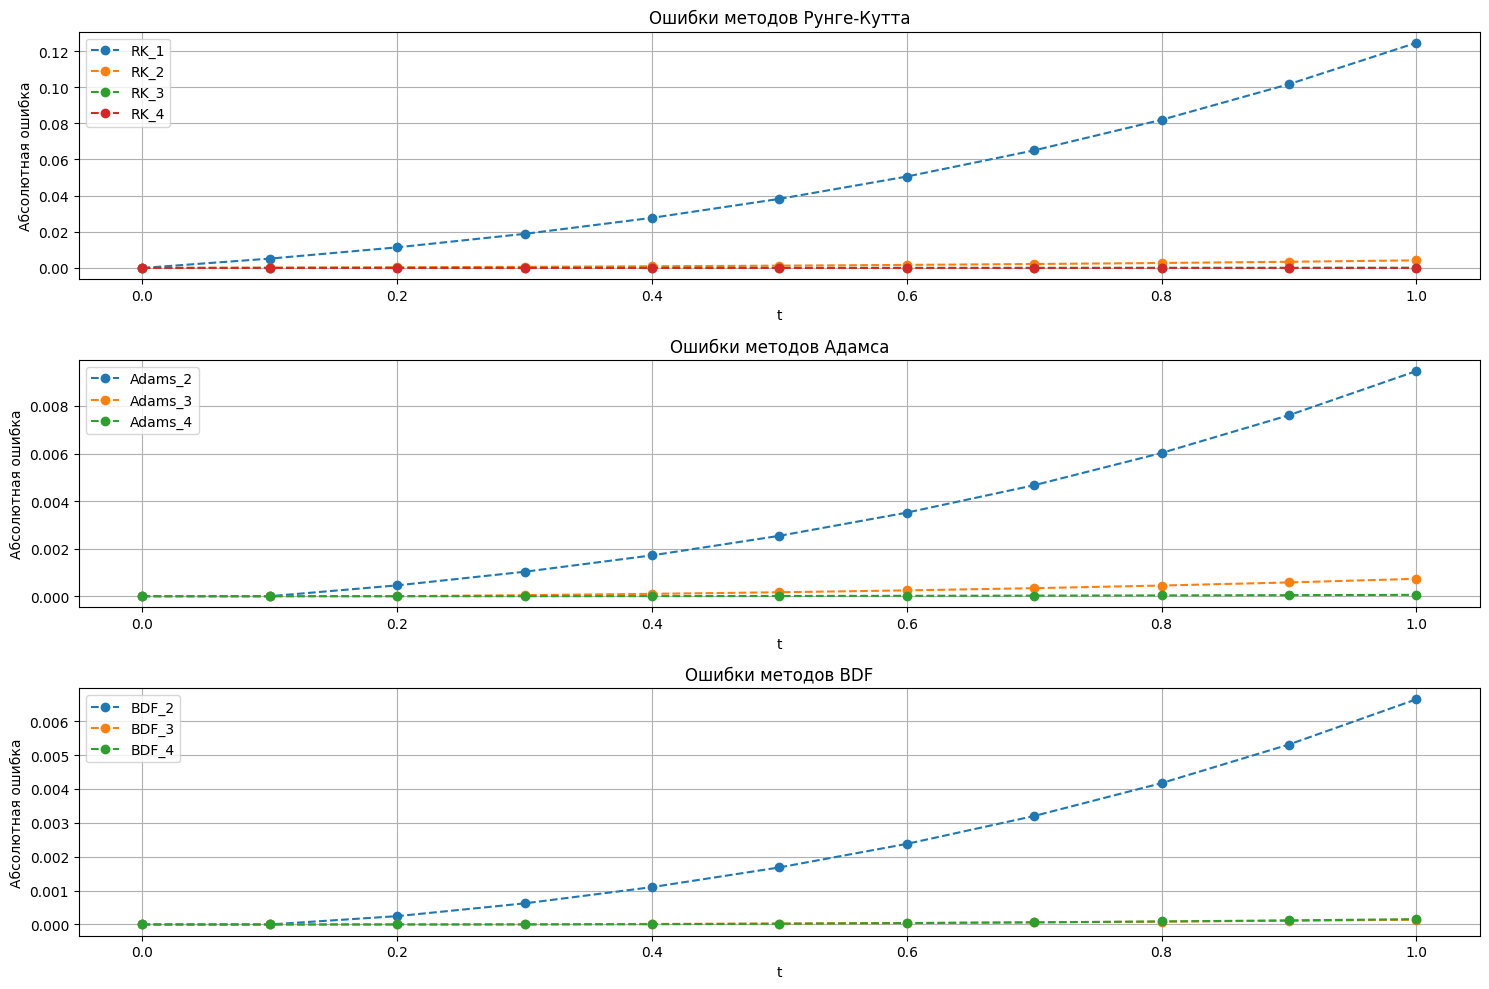

In [ ]:
# Вычисление ошибок для разных методов
errors = {}

# Для методов Рунге-Кутта
for order in [1, 2, 3, 4]:
    exact = exact_solution(t_rk)
    approx = sol_rk[order]
    errors[f'RK_{order}'] = np.abs(exact - approx)

# Для методов Адамса
for order in [2, 3, 4]:
    exact = exact_solution(t_adams)
    approx = sol_adams[order]
    errors[f'Adams_{order}'] = np.abs(exact - approx)

# Для методов BDF
for order in [2, 3, 4]:
    exact = exact_solution(t_bdf)
    approx = sol_bdf[order]
    errors[f'BDF_{order}'] = np.abs(exact - approx)

# Визуализация ошибок
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
for method in ['RK_1', 'RK_2', 'RK_3', 'RK_4']:
    plt.plot(t_rk, errors[method], 'o--', label=method)
plt.title('Ошибки методов Рунге-Кутта')
plt.xlabel('t')
plt.ylabel('Абсолютная ошибка')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
for method in ['Adams_2', 'Adams_3', 'Adams_4']:
    plt.plot(t_adams, errors[method], 'o--', label=method)
plt.title('Ошибки методов Адамса')
plt.xlabel('t')
plt.ylabel('Абсолютная ошибка')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
for method in ['BDF_2', 'BDF_3', 'BDF_4']:
    plt.plot(t_bdf, errors[method], 'o--', label=method)
plt.title('Ошибки методов BDF')
plt.xlabel('t')
plt.ylabel('Абсолютная ошибка')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()